In [3]:
# EDA (Exploratory Data Analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#modeling
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [4]:
data = pd.read_csv("D:\KULIAH\latihan\dataset\heart.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15500\237602552.py:1: SyntaxWarning: invalid escape sequence '\K'
  data = pd.read_csv("D:\KULIAH\latihan\dataset\heart.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


EXPLORATORY DATA ANALYSIS
1. 

<Axes: xlabel='target'>

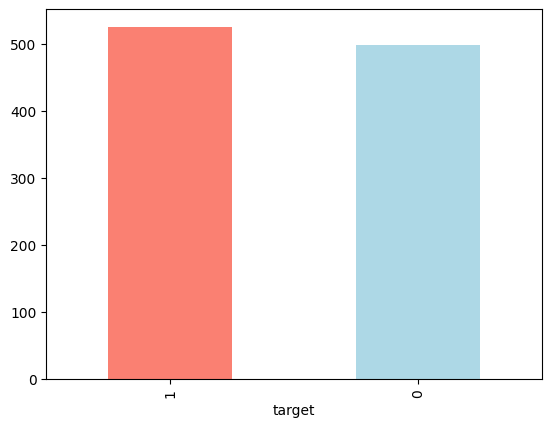

In [5]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

<Axes: xlabel='sex'>

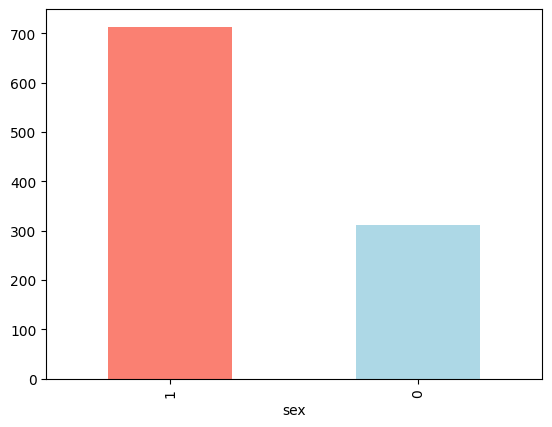

In [6]:
data['sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

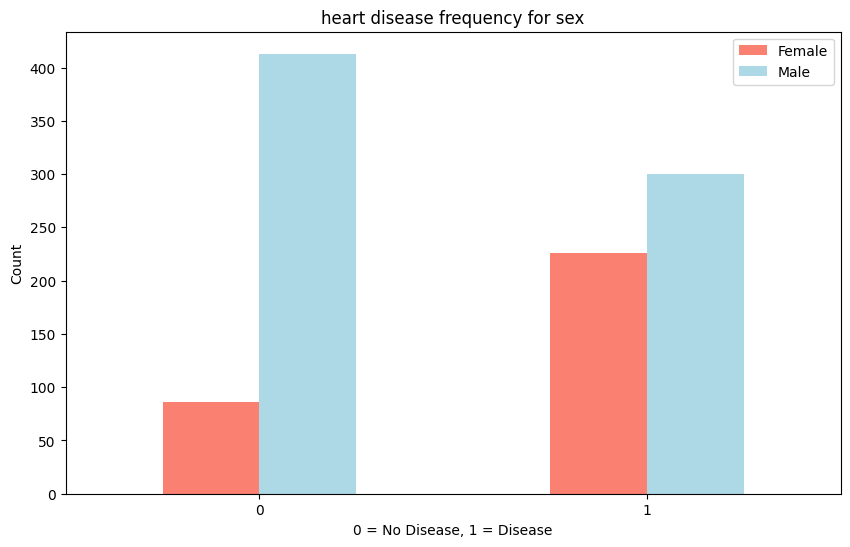

In [7]:
#crosstab compare target dengan sex

pd.crosstab(data['target'], data['sex']).plot(kind='bar', 
                                              figsize=(10, 6),
                                              color=['salmon', 'lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()


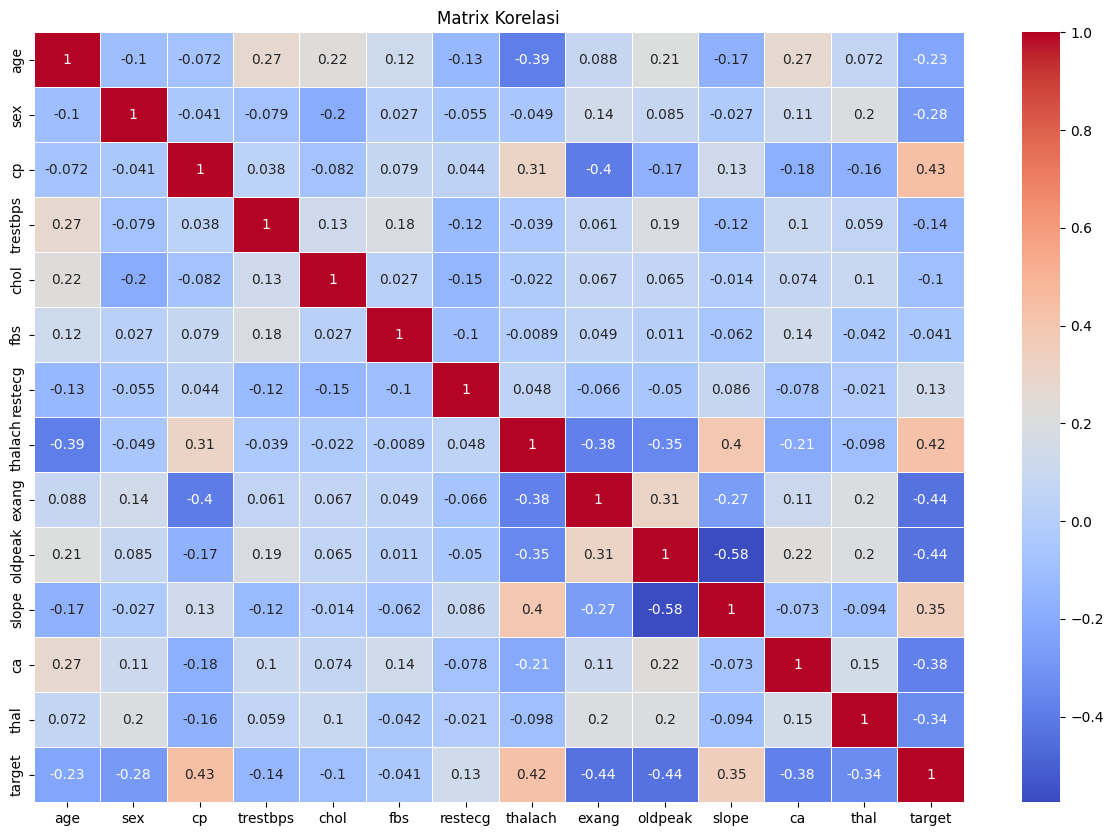

In [8]:
#correlation matrix

matrix_correlation = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrix Korelasi")
plt.show()

MODELING

In [9]:
X = data.drop("target", axis=1)
Y = data["target"]
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)    

In [10]:
#model
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#model training
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8682926829268293,
 'KNN': 0.7560975609756098,
 'Random Forest': 1.0}

In [11]:
#model evaluation
def model_evaluation(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"Classification Report: \n{classification_report(Y_test, Y_pred)}")
    print(f"Precision Score: {precision_score(Y_test, Y_pred)}")
    print(f"Recall Score: {recall_score(Y_test, Y_pred)}")
    print(f"F1 Score: {f1_score(Y_test, Y_pred)}")
    
print("Logistic Regression")
model_evaluation(LogisticRegression(), X_train, X_test, Y_train, Y_test)
print("")
print("KNN")
model_evaluation(KNeighborsClassifier(), X_train, X_test, Y_train, Y_test)
print("")
print("Random Forest")
model_evaluation(RandomForestClassifier(), X_train, X_test, Y_train, Y_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       106
           1       0.83      0.92      0.87        99

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Precision Score: 0.8272727272727273
Recall Score: 0.9191919191919192
F1 Score: 0.8708133971291866

KNN
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       106
           1       0.74      0.77      0.75        99

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205

Precision Score: 0.7378640776699029
Recall Score: 0.7676767676767676
F1 Score: 0.7524752475247525

Random Forest
Classification Report: 
              precision    recall  f1-

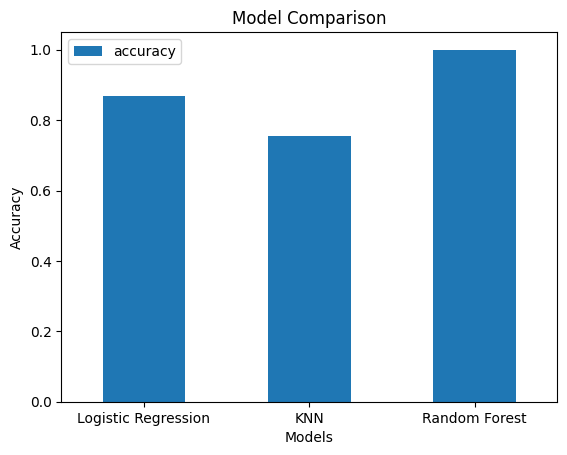

In [12]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot(kind="bar")
plt.title("Model Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.show()

In [13]:
#hyperparameter tuning KNN

train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))
    
# Convert the scores to a DataFrame for better visualization
scores_df = pd.DataFrame({"Neighbors": neighbors, "Train Score": train_scores, "Test Score": test_scores})

# Print the DataFrame
print(scores_df)

    Neighbors  Train Score  Test Score
0           1     1.000000    1.000000
1           2     0.995122    0.960976
2           3     0.990244    0.917073
3           4     0.941463    0.819512
4           5     0.920732    0.756098
5           6     0.831707    0.760976
6           7     0.778049    0.726829
7           8     0.763415    0.712195
8           9     0.756098    0.721951
9          10     0.760976    0.731707
10         11     0.762195    0.712195
11         12     0.750000    0.707317
12         13     0.746341    0.721951
13         14     0.763415    0.746341
14         15     0.743902    0.721951
15         16     0.756098    0.731707
16         17     0.753659    0.721951
17         18     0.748780    0.726829
18         19     0.759756    0.726829
19         20     0.743902    0.721951


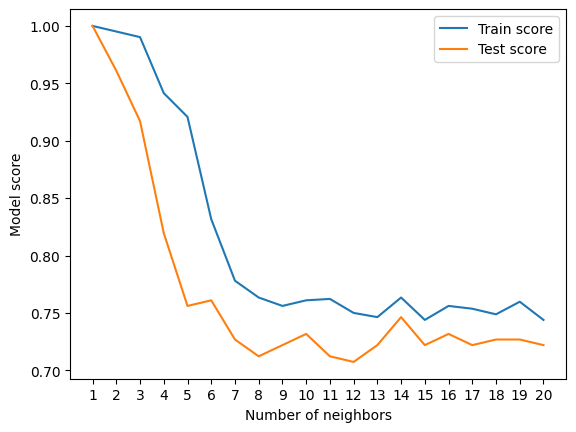

In [14]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()

hypertuning randomforest tuning with RandomizedSearchCV

In [15]:
#hypertuning randomforest with RandomizedSearchCV
np.random.seed(10)

rf_param = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_param,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, Y_train)





Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [16]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [17]:
rs_rf.score(X_test, Y_test)

0.9902439024390244

### MODEL EVALUATION ###

1.ROC and AUC
2. COnfussionmatrix
3. classifications report

In [18]:
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [19]:
Y_test

29     0
92     0
311    0
379    1
929    0
      ..
782    1
694    0
124    0
382    0
43     0
Name: target, Length: 205, dtype: int64

In [20]:
confusion_matrix(Y_test, y_preds)

array([[106,   0],
       [  2,  97]], dtype=int64)

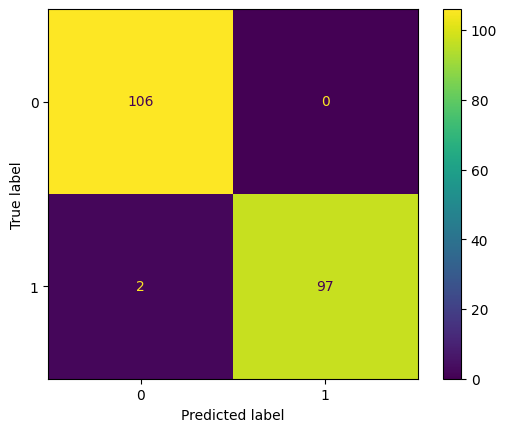

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, y_preds)
plt.show()

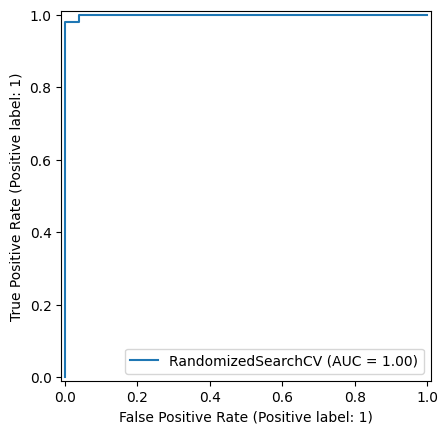

In [23]:
RocCurveDisplay.from_estimator(estimator=rs_rf, X=X_test, y=Y_test)
plt.show()

In [24]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       1.00      0.98      0.99        99

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [25]:
#save model
import pickle

with open("randomForest-HeartDiseaseClassifiacation.pkl", "wb") as file:
    pickle.dump(rs_rf, file)
